# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [2]:
import pandas as pd 

df = pd.read_csv('./../database/cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [7]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [8]:
df['price_usd'].mean()

6639.971021255613

In [9]:
df['price_usd'].median()

4800.0

<AxesSubplot:ylabel='Frequency'>

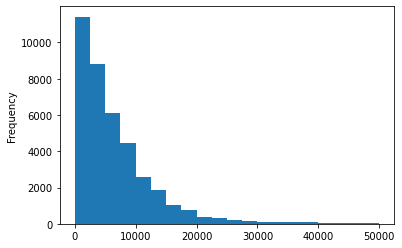

In [12]:
df['price_usd'].plot.hist(bins=20) #bins son los intervalos o segmentaciones

In [23]:
df[['color','price_usd']].groupby('color')

KeyError: "None of [Index(['brown', 'green', 'yellow', 'violet', 'blue', 'white', 'other', 'black',\n       'orange', 'grey', 'red', 'silver'],\n      dtype='object')] are in the [columns]"

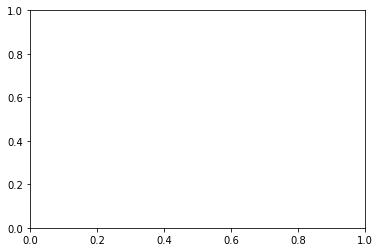

In [20]:
x = set(df['color'].values)
df.plot.scatter(list(x), y=df.price_usd)

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

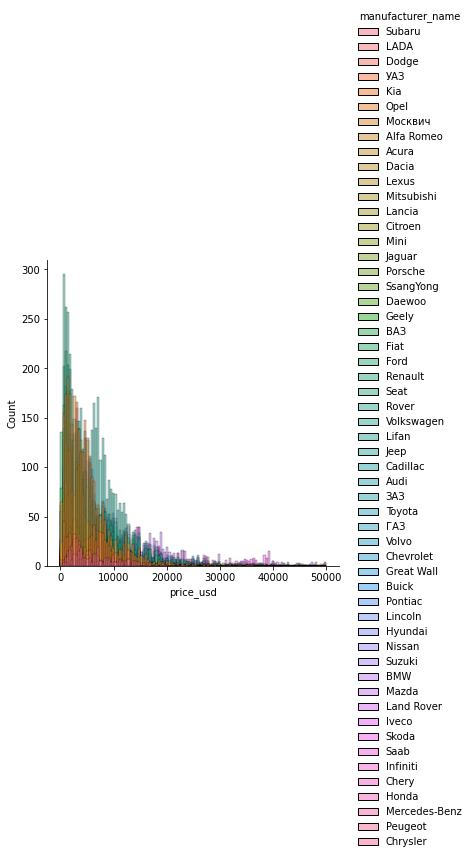

In [24]:
import seaborn as sns

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name') #hue es una variable categorica y genera un histogramasegn el manufacturer_name

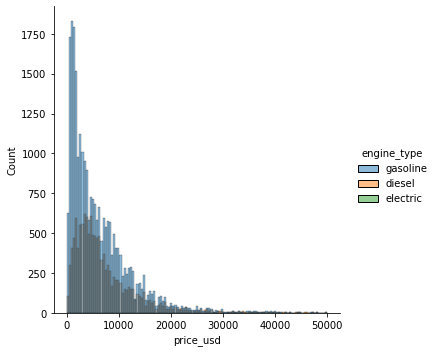

In [6]:
sns.displot(df, x="price_usd", hue="engine_type") # engine type es nuestra categoriaa ahora

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

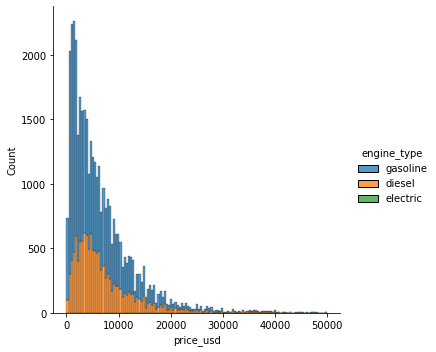

In [7]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [8]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



<AxesSubplot:xlabel='price_usd', ylabel='Count'>

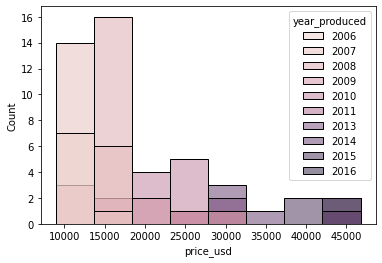

In [9]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>